<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>

</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan-train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan-test.csv')

In [3]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



In [5]:
ds = train['Loan_Status'].value_counts()
ds

Y    422
N    192
Name: Loan_Status, dtype: int64

Visualize the target column

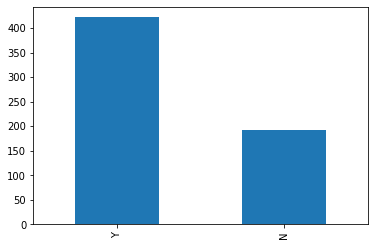

In [6]:
ds.plot.bar()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [7]:
train_missing_values = train.isnull().sum()

In [8]:
perc_train = train.isnull().sum() / len(train) * 100
perc_train

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
train_missing = pd.concat([train_missing_values, perc_train], axis=1)
train_missing.columns = ['No. of missing values',' % of missing values']
train_missing

,No. of missing values,% of missing values
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


In [10]:
test_missing_values = test.isnull().sum()
perc_test = test.isnull().sum() / len(test) * 100
test_missing = pd.concat([test_missing_values, perc_test], axis=1)
test_missing.columns = ['No. of missing values',' % of missing values']
test_missing

,No. of missing values,% of missing values
Loan_ID,0,0.000000
Gender,11,2.997275
Married,0,0.000000
Dependents,10,2.724796
Education,0,0.000000
Self_Employed,23,6.267030
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,5,1.362398
Loan_Amount_Term,6,1.634877


Visualize the missing values using Missingno library

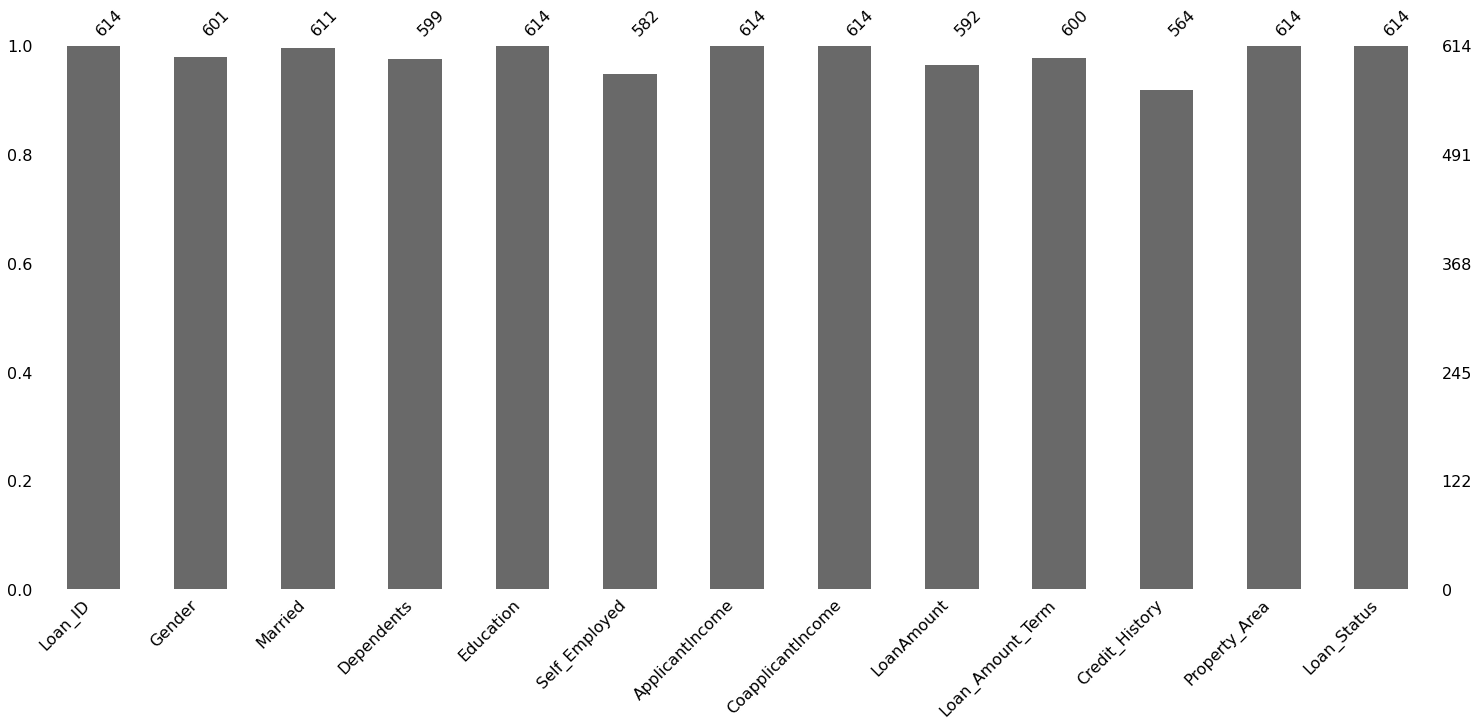

In [11]:
import missingno as msno 
msno.bar(train)

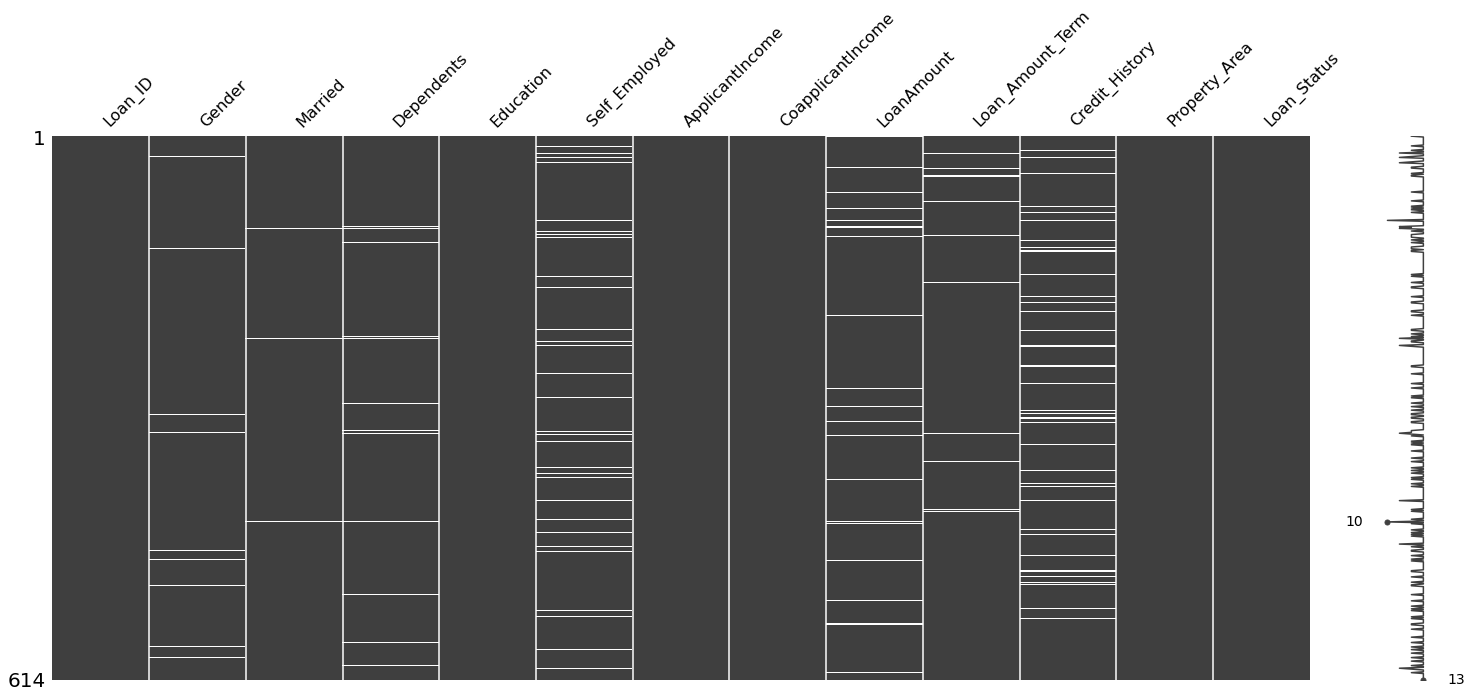

In [12]:
msno.matrix(train)

# <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

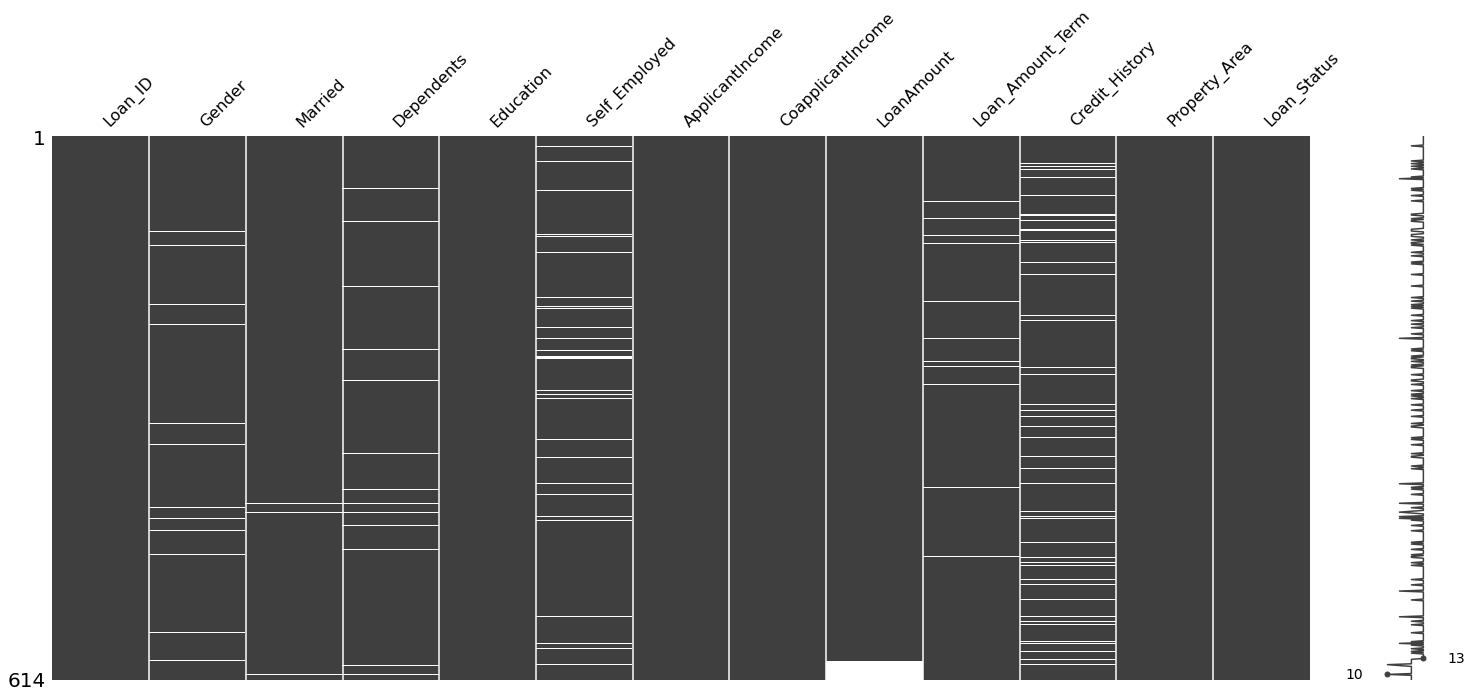

In [31]:
msno.matrix(train.sort_values('LoanAmount'))

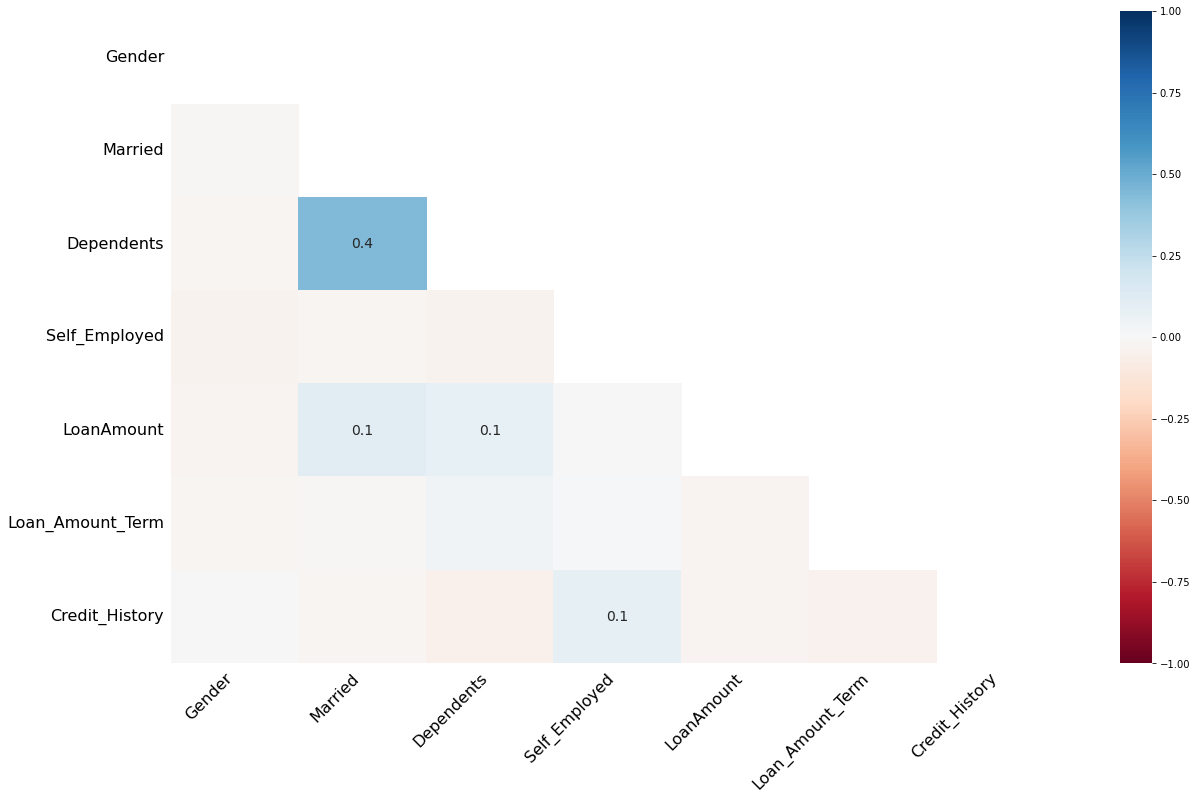

In [33]:
msno.heatmap(train)

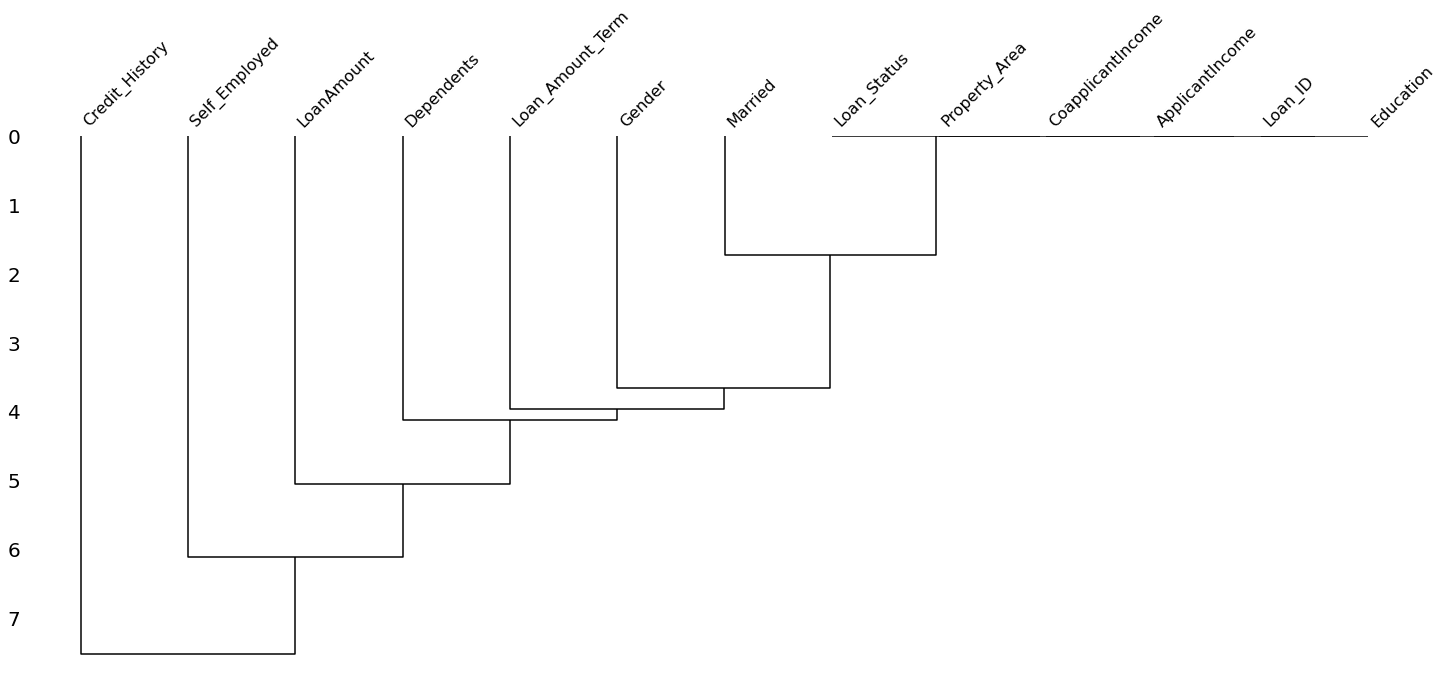

In [35]:
msno.dendrogram(train)

Write the reasons for the missing values

*write here ..*

# <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [149]:
train1 = train.copy()
train1.dropna(subset = ['LoanAmount'],how = 'any', inplace = True)
train1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [150]:
train1['LoanAmount'].isnull().sum()

0

In [151]:
train1 = train.copy()


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['LoanAmount'].to_numpy().reshape(-1, 1)


array([[ nan],
       [128.],
       [ 66.],
       [120.],
       [141.],
       [267.],
       [ 95.],
       [158.],
       [168.],
       [349.],
       [ 70.],
       [109.],
       [200.],
       [114.],
       [ 17.],
       [125.],
       [100.],
       [ 76.],
       [133.],
       [115.],
       [104.],
       [315.],
       [116.],
       [112.],
       [151.],
       [191.],
       [122.],
       [110.],
       [ 35.],
       [120.],
       [201.],
       [ 74.],
       [106.],
       [114.],
       [320.],
       [ nan],
       [100.],
       [144.],
       [184.],
       [110.],
       [ 80.],
       [ 47.],
       [ 75.],
       [134.],
       [ 96.],
       [ 88.],
       [ 44.],
       [144.],
       [120.],
       [144.],
       [100.],
       [120.],
       [112.],
       [134.],
       [286.],
       [ 97.],
       [ 96.],
       [135.],
       [180.],
       [144.],
       [120.],
       [ 99.],
       [165.],
       [ nan],
       [116.],
       [258.],
       [12

In [153]:
train1['LoanAmount'] = scaler.fit_transform(train['LoanAmount'].to_numpy().reshape(-1, 1))
train1['LoanAmount']

0           NaN
1      0.172214
2      0.082489
3      0.160637
4      0.191027
         ...   
609    0.089725
610    0.044863
611    0.353111
612    0.257598
613    0.179450
Name: LoanAmount, Length: 614, dtype: float64

In [154]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
train1['LoanAmount'] = imp.fit_transform(train1['LoanAmount'].to_numpy().reshape(-1, 1))

In [155]:
train1['LoanAmount'].isnull().sum()

0

In [98]:
##from sklearn.experimental import enable_iterative_imputer
##from sklearn.impute import IterativeImputer
##imp_mean = IterativeImputer(random_state = 0)

In [99]:
##train1 = train.copy()

In [100]:
##train1['LoanAmount'] = imp_mean.fit_transform(train1['LoanAmount'].to_numpy().reshape(-1, 1))

In [101]:
##train1['LoanAmount'].isnull().sum()

0

In [156]:
train1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.198860,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,0.257598,360.0,1.0,Urban,Y


# <font color = 'Orange'> Encode non numerical values </font>

In [157]:
train1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.198860,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,0.257598,360.0,1.0,Urban,Y


In [159]:
train1['Self_Employed'].value_counts()
classes = list(set(train['Self_Employed']))
dict = {}
for i in range(0, len(classes)):
  dict[classes[i]] = i
dict

{'No': 2, 'Yes': 1, nan: 0}

In [160]:
train1['Self_Employed'] = [dict[i] for i in train1['Self_Employed']]


In [161]:
train1['Self_Employed']

0      2
1      2
2      1
3      2
4      2
      ..
609    2
610    2
611    2
612    2
613    1
Name: Self_Employed, Length: 614, dtype: int64

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [163]:
train1.to_csv('Lab3_data.csv')

Print the first rows of your final Dataset

In [164]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,2,5849,0.0,0.198860,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,2,4583,1508.0,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,2,2583,2358.0,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,2,6000,0.0,0.191027,360.0,1.0,Urban,Y
